In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Carregar os dados
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [3]:
# Separar as variáveis independentes (X) e a variável dependente (y)
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

In [4]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Aplicar undersampling
rus = RandomUnderSampler(random_state=42, sampling_strategy='majority')
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [6]:
# Treinar o modelo Random Forest com os dados balanceados
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [7]:
# Treinar outro modelo para comparação, por exemplo, Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=42)

In [8]:
# Avaliar os modelos usando k-fold cross-validation
k=5
rf_cv_scores = cross_val_score(rf_clf, X_resampled, y_resampled, cv=k)
dt_cv_scores = cross_val_score(dt_clf, X_resampled, y_resampled, cv=k)

print(f'Acurácia média do Random Forest (k-fold CV): {rf_cv_scores.mean():.2f}')
print(f'Acurácia média do Decision Tree (k-fold CV): {dt_cv_scores.mean():.2f}')

Acurácia média do Random Forest (k-fold CV): 0.81
Acurácia média do Decision Tree (k-fold CV): 0.67


C:\Users\lvant\AppData\Local\Temp\ipykernel_13056\2673604365.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=accuracies, palette='viridis')


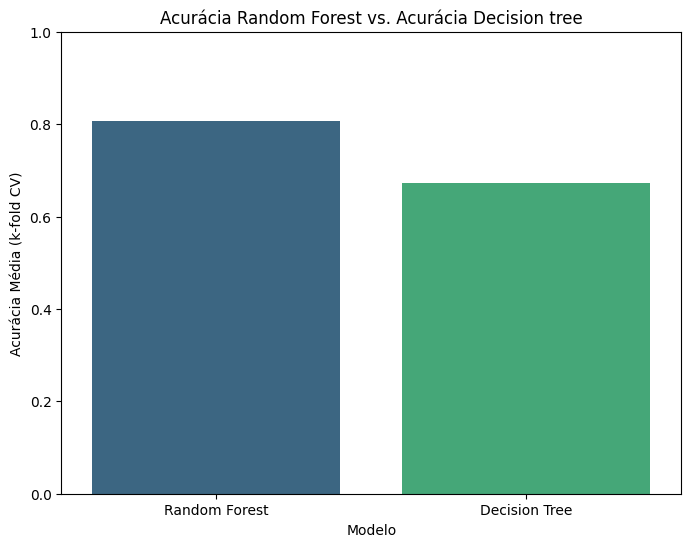

In [18]:
# Gráfico comparando acurácia original e após o tratamento
accuracies = [rf_cv_scores.mean(), dt_cv_scores.mean()]
labels = ['Random Forest', 'Decision Tree']

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.xlabel('Modelo')
plt.ylabel('Acurácia Média (k-fold CV)')
plt.title('Acurácia Random Forest vs. Acurácia Decision tree')
plt.show()